# PART 1:

**HOW TO CLEAN DATA WITH PYTHON**

**1.** **Firstly import all libraries**

In [22]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

**2.** **Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.**

In [23]:
all_data=pd.DataFrame()
for f in glob("states"):
    us_census=all_data.concate(pd.read_csv(f),ignore_index=True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


**3.** **Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?**
Answer: Yes, it hinders us as the datatype of income is an object so first we should convert it into float

In [24]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Male', 'Female'],
      dtype='object')

In [25]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Male            int32
Female        float64
dtype: object

**4.** **Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.**

In [26]:
us_census.head().dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Male            int32
Female        float64
dtype: object

**Regex to the Rescue**

**5.** **Use regex to turn the Income column into a format that is ready for conversion into a numerical type.**

In [27]:
import re
us_census["Income"]=us_census["Income"].replace("\$"," ",regex=True)
us_census["Income"]=us_census["Income"].astype("float")
print(us_census["Income"].dtypes)
print("Now the Income column is converted into numerical type")

float64
Now the Income column is converted into numerical type


**6.Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column. Split the column into those two new columns using str.split and separating out those results.**

In [28]:
GenderSplit=us_census["GenderPop"].str.split('_',expand=True)
GenderSplit.head()

,0,1
0,2341093M,2489527F
1,384160M,349215F
2,3299088M,3342840F
3,1451913M,1506295F
4,19087135M,19334329F


**7. Convert both of the columns into numerical datatypes.**

**There is still an M or an F character in each entry! We should remove those before we convert.**

In [29]:
us_census["Male"]=GenderSplit[0].str.extract("(\d+)")
us_census["Female"]=GenderSplit[1].str.extract("(\d+)")
print(us_census["Male"].head())
us_census["Male"]=us_census["Male"].astype(int)
us_census["Female"]=us_census["Female"].astype(float)
print("After converting data type of Male and Female columns")
print(us_census["Male"].head())
print(us_census["Female"].head())

0     2341093
1      384160
2     3299088
3     1451913
4    19087135
Name: Male, dtype: object
After converting data type of Male and Female columns
0     2341093
1      384160
2     3299088
3     1451913
4    19087135
Name: Male, dtype: int32
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
Name: Female, dtype: float64


In [30]:
us_census.drop(["GenderPop","Unnamed: 0"], axis=1)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329.0
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667,2630239.0
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607,1841615.0
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413,478041.0
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674,340810.0


**8.**
**Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!**

**Use matplotlib to make a scatterplot!**

**plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!**

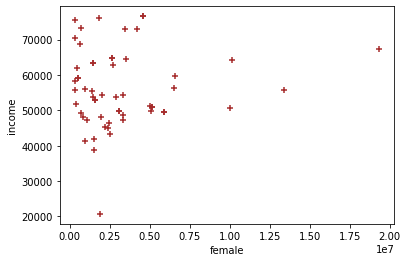

In [31]:
u=us_census["Female"]
v=us_census["Income"]
plt.scatter(u,v,color="brown",marker="+")
plt.xlabel('female')
plt.ylabel('income')
plt.show()

**9. Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.**

**We can fill in those nans by using pandas’ .fillna() function.**

**You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.**

**Print out the Women column after filling the nan values to see if it worked!**

In [32]:
Nan_Values=us_census['Female'][us_census['Female'].isnull()]
Nan_Values

23   NaN
24   NaN
31   NaN
Name: Female, dtype: float64

In [33]:
us_census["Female"]=us_census["Female"].fillna(us_census["TotalPop"]-us_census["Male"])
us_census["Female"]

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

**10. We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.**

In [34]:
Duplicates=us_census[us_census.duplicated()]
display(Duplicates)
print("There are no duplicated rows")

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female


There are no duplicated rows


**11. Drop those duplicates using the .drop_duplicates() function.**

In [35]:
us_census=us_census.drop_duplicates()

**12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.**

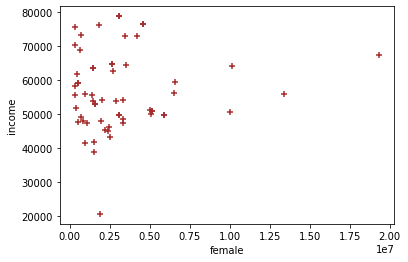

In [36]:
u=us_census["Female"]
v=us_census["Income"]
plt.scatter(u,v,color="brown",marker="+")
plt.xlabel('female')
plt.ylabel('income')
plt.show()

**Histograms of Races**

**13. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.**

In [37]:
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].head()

,Hispanic,White,Black,Native,Asian,Pacific
0,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%
1,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%
2,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%
3,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%
4,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%


In [38]:
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]]=us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].replace("%"," ",regex=True)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]]

,Hispanic,White,Black,Native,Asian,Pacific
0,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865
1,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378
2,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833
3,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315
4,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353
5,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN
6,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN
7,15.604830917874388,67.6770531400966,10.34806763285027,0.12620772946859898,4.021980676328502,0.018599033816425123
8,8.82476635514019,64.63271028037383,20.743925233644834,0.25981308411214965,3.2686915887850483,NaN
9,9.165921787709499,33.103910614525134,51.77653631284915,0.20055865921787713,3.3832402234636865,0.029608938547486034


In [39]:
us_census["Pacific"]=us_census["Pacific"].fillna(0)
us_census["Pacific"]

0       0.03435374149659865 
1        1.0586826347305378 
2       0.16763157894736833 
3       0.14686131386861315 
4       0.35141038442336353 
5                          0
6                          0
7      0.018599033816425123 
8                          0
9      0.029608938547486034 
10      0.05151006711409391 
11     0.046601941747572824 
12     0.046601941747572824 
13        8.758860759493672 
14       0.1271812080536914 
15      0.02003210272873195 
16      0.03262458471760798 
17     0.055164034021871235 
18     0.055164034021871235 
19                         0
20     0.046438232642019836 
21     0.039184397163120555 
22      0.01566951566951567 
23      0.03628509719222463 
24      0.03628509719222463 
25       0.0198087431693989 
26      0.01954941860465116 
27     0.032908545727136446 
28     0.015045592705167175 
29      0.10165706051873193 
30      0.10165706051873193 
31      0.07222222222222222 
32      0.05714285714285715 
33       0.5745213549337267 
34     0.01609

In [40]:
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].dtypes

Hispanic    object
White       object
Black       object
Native      object
Asian       object
Pacific     object
dtype: object

In [41]:
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]]=us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].astype(float)

**14. Try to make a histogram for each one!**

**You will have to get the columns into numerical format, and those percentage signs will have to go.**

**Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.**


Get Creative

**15. Phew. You’ve definitely impressed your boss on your first day of work.**

**But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?**

**Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.**

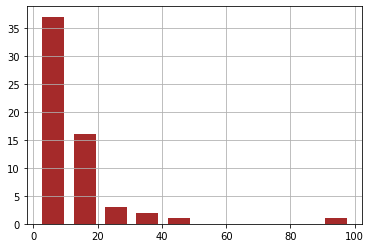

In [42]:
us_census['Hispanic'].hist(rwidth=0.70,color='brown')

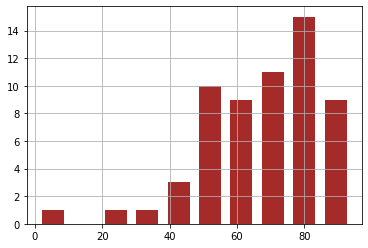

In [43]:
us_census['White'].hist(rwidth=0.70,color='brown')

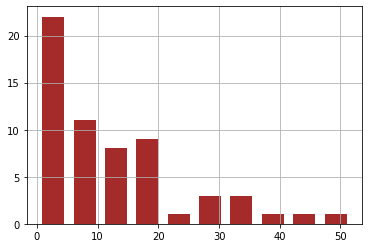

In [44]:
us_census['Black'].hist(rwidth=0.70,color='brown')

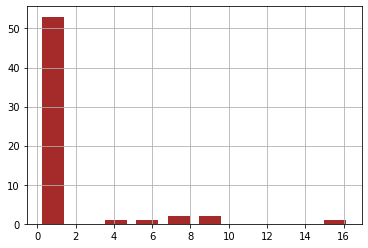

In [45]:
us_census['Native'].hist(rwidth=0.70,color='brown')

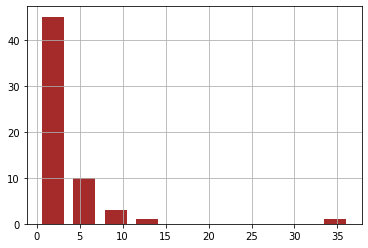

In [46]:
us_census['Asian'].hist(rwidth=0.70,color='brown')

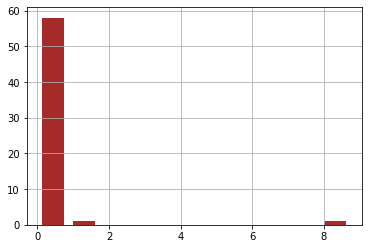

In [47]:
us_census['Pacific'].hist(rwidth=0.70,color='brown')